## Random Projection

## What is Random Projection?
It is a technique where you project your high-dimensional data onto a lower- dimensional subspace using a random matrix. 

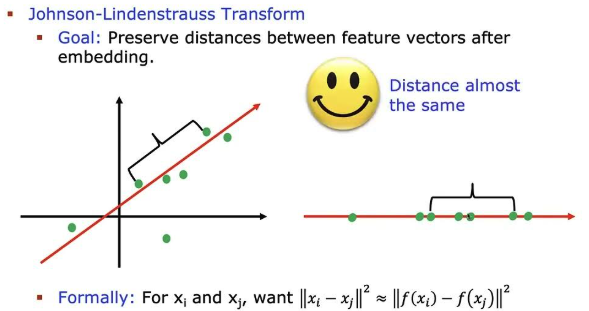

In [1]:
# Libraries
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
from sklearn.datasets import fetch_20newsgroups_vectorized
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
# Load dataset

newsgroup = fetch_20newsgroups_vectorized(subset='all')
X = newsgroup.data
y = newsgroup.target

X.shape

(18846, 130107)

In [3]:
# Apply the Gaussian Random Projection. 

transformer = GaussianRandomProjection(n_components = 50)
X_reduced = transformer.fit_transform(X.toarray())
X_reduced.shape

(18846, 50)

In [4]:
# Use T-SNE  to 2D visulaization 
tsne = TSNE(n_components = 2, random_state=42)
X_tsne = tsne.fit_transform(X_reduced)

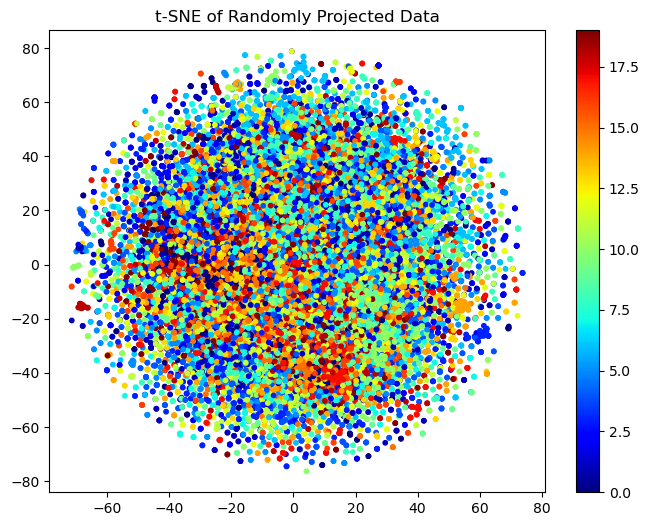

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c= y, cmap= 'jet', s = 10)
plt.colorbar()
plt.title('t-SNE of Randomly Projected Data')
plt.show()

In [6]:
# apply PCA for comparison

pca = PCA(n_components = 50)
X_pca = pca.fit_transform(X.toarray())

# Use t-SNE for PCA result 
X_pca_tsne = tsne.fit_transform(X_pca)

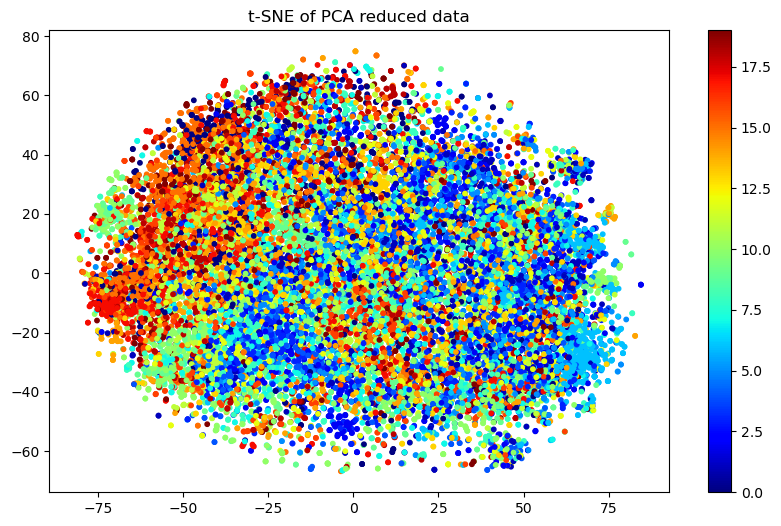

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(X_pca_tsne[:,0], X_pca_tsne[:,1],c = y, cmap= 'jet', s = 10)
plt.colorbar()
plt.title("t-SNE of PCA reduced data")
plt.show()